# Metody Numeryczne - Labolatorium nr. 4 (FFT) #

**Imię i Nazwisko:** Bartosz Polak  
**Numer Indeksu:** 267626  
**Kierunek:** Mechatronika  
**Data:** 28.11.2024

---

## 1. Wstęp
<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Dzisiejsze zajęcia były poświęcone szybkiej transformacie Fouriera. Szybka trasnformata fouriera (FFT) jest algorytmem opracowanym przez Cooleya i Tookeya w 1965 roku. Pozwala on na otrzymanie przebiegu w dziedzinie częstotliwości w dużo szybszym czasie od tradycyjnego podejścia. Podczas przeprowadzania szybkiej trasnformaty Fouriera trzeba pamiętać o tym, aby ustawić stały czas próbkowania, co podczas pomiarów rzeczywistych może być trochę problematyczne. W takim przypadku często stosuje się interpolację uzyskanych danych pomiarowych, aby uzyskać równy czas pomiędzy próbkami. Również istotne jest aby liczba próbek była potęgą dwójki, co zapewnia szybsze działanie algorytmu. W tym przypadku również albo ucina się dane pomiarowe do uzyskania najbliższej wartości potęgi dwójki, albo tworzy się interpolację danych pomiarowych i wybiera się liczbę próbke, która jest kolejną liczbą potęgi dwójki. Zadaniem na labolatorium było przedstawienie jakiegoś wykresu, który zmienia się okresowo, a następnie przy pomocy szybkiej trasnformaty fouriera obliczyć okres zmian tej funkcji. W tym zadaniu istotne jest zrozumienie twierdzenia Shannona o próbkowaniu. Zgodnie z twierdzeniem Shannona-Kotielnikowa o próbkowaniu aby uzyskać odwzorowanie rzeczywistego przebiegu sygnału trzeba go próbkować z częstotliwością przynajmniej 2 razy większą od najwyższej częstotliwości sygnału.
</div>

## 2. Zadania

#### A. Użyć interpolacji trygonometrycznej do znalezienia okresu zmienności tygodniowego (lub miesięcznego) wykresu temperatury.

W tym zadaniu zostanie obliczony okres zmian temperetury w zadanym przedziale czasowym. Na początku zaimportowano dane ze zmianą temperatury z pilku oraz dodano je do odpowiednich list co ułatwi późniejszą obróbkę tak jak w poprzednich zadaniach.

In [2]:
import pandas as pd
import numpy as np

# Wczytanie pliku z uwzględnieniem średnika jako seperatora, oraz pominięcie pierwszych 4 wierszy, które nie posiadają intresujących nas danych
df = pd.read_csv('Outdoor_temperature_2017-09.csv', delimiter=';', skiprows=4)

# Zapisa odpowienich danych z kolumn w listy, 
timeStamp = df.iloc[:, 0].tolist()
data = df.iloc[:, 1].tolist()
temperatura = df.iloc[:, 2].tolist()

# Wyświetlenie pierwszych kilku wierszy
df.head()

,1504216976,2017/09/01 00:02:56,21.4
0,1504217283,2017/09/01 00:08:03,21.3
1,1504217540,2017/09/01 00:12:20,21.1
2,1504217847,2017/09/01 00:17:27,21.1
3,1504218155,2017/09/01 00:22:35,20.9
4,1504218462,2017/09/01 00:27:42,20.9


W kolejnym kroku wybieramy interesujący nas przedział dat, w tym przypadku wybrano okres 3 tygodni. Następnie przetwarzamy indeks na format czasu ze strigiem.

In [24]:
# Wybieramy interesujący nas przedział dat
# Ustawienia zakresu dat (t1 i t2) jako stringi
t_1 = '2017/09/01 08:00:00'
t_2 = '2017/09/22 08:00:00'

df = pd.DataFrame(data={"data": data, "temperatura": temperatura, "timeStamp": timeStamp})

# Konwersja kolumny z datami do specjalnego typu datetime
df['data'] = pd.to_datetime(df['data'])

# Ustawienie kolumny 'data' jako indeks
df.set_index('data', inplace=True)

# Konwersja kolumny 'temperatura' na typ float
df['temperatura'] = df['temperatura'].astype(float)

# wyświetlenie pierwszych kilku wierszy
df.head()

,temperatura,timeStamp
data,,
2017-09-01 00:08:03,21.3,1504217283
2017-09-01 00:12:20,21.1,1504217540
2017-09-01 00:17:27,21.1,1504217847
2017-09-01 00:22:35,20.9,1504218155
2017-09-01 00:27:42,20.9,1504218462


<Axes: xlabel='data'>

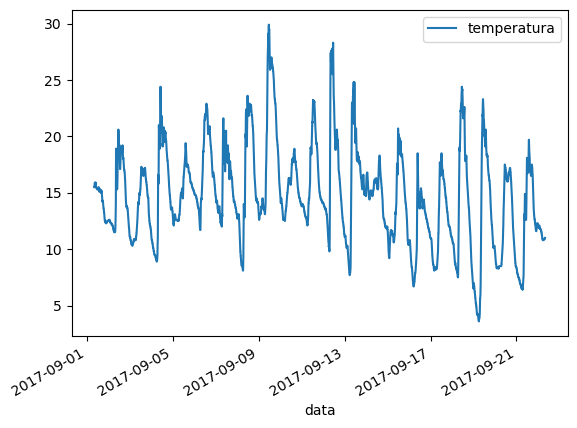

In [25]:
# Rysowanie wykresu z wcześniej ustalonego przedziału dat
df[t_1:t_2].plot(y='temperatura')

W tym kroku najpierw zrobiono interpolację otrzymanych danych, aby zachować stały okres próbkowania, następnie usunięto składową stałą w formie temperatury średniej oraz obliczono szybką transformatę fouriera

<Axes: xlabel='częstotliwość'>

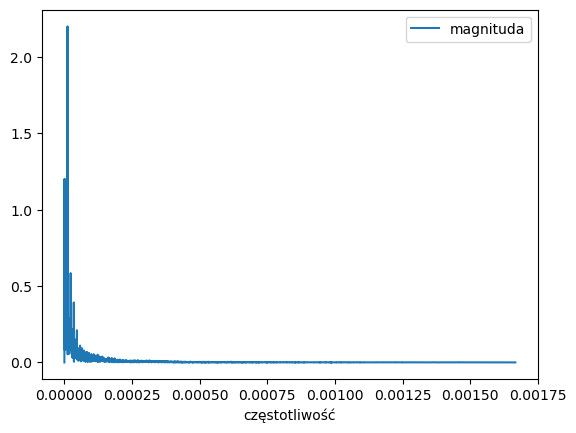

In [121]:

# Ustawienie zakresu jako wcześniej zdefiniowanych wartości t1 i t2
df_part = df[t_1:t_2]

# przypisanie wartości czasów w sekundach(timestamp) i temperatury do osobnych list
# wartość temperatury jest interpolowana przez to że pomiary nie były wykonywane w równych okresach czasu.
time = df_part['timeStamp'].values
temperature = df_part['temperatura'].interpolate(method='linear').values

# ustawienie częstotliwości próbkowania (co 5 minut)
sample_rate = 1 / (5 * 60)  # 1 próba co 5 minut
samples = np.arange(time[0], time[-1], 1 / sample_rate)  # równomierny czas próbkowania

# interpolacja temperatury w próbkach czasowych
interpolated_temperature = np.interp(samples, time, temperature)

# usunięcie składowej stałej sygnału w postaci średniej wartości temperatury
signal = interpolated_temperature - np.mean(interpolated_temperature)

# obliczenie Szybkej transformaty Fouriera
fft_output = np.fft.rfft(signal)
num_of_samples = len(samples)
magnitude_only = np.abs(fft_output) / num_of_samples
frequencies = np.fft.rfftfreq(num_of_samples, d= 1/sample_rate)

# zapis danych do dataframe'a
fft_df = pd.DataFrame({'częstotliwość': frequencies, 'magnituda': magnitude_only})

# wykres
fft_df.plot(x='częstotliwość', y='magnituda')

Aby lepiej narysować wykres z ustawieniem ograniczenia na osi X użyto matplotlib.

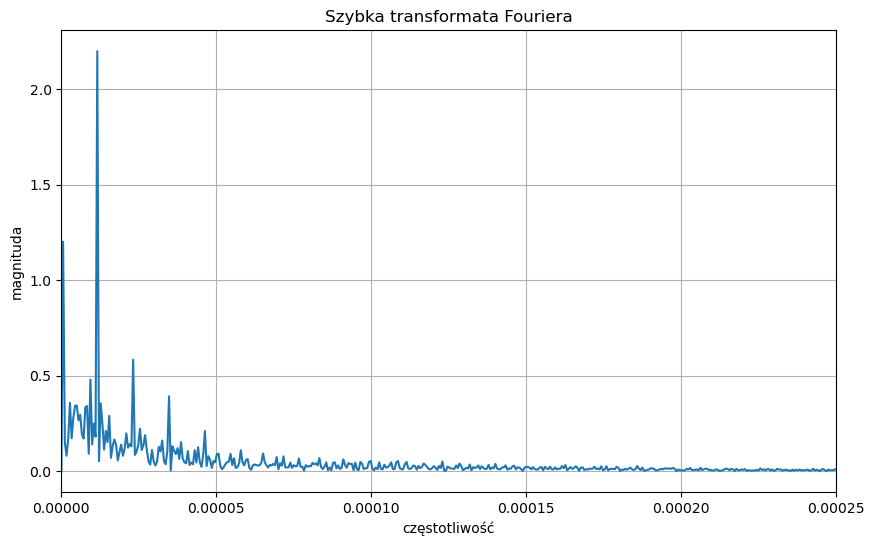

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fft_df['częstotliwość'], fft_df['magnituda'])
plt.xlim(0, 0.00025)
plt.xlabel('częstotliwość')
plt.ylabel('magnituda')
plt.title('Szybka transformata Fouriera')
plt.grid()
plt.show()

Jak widać na wykresie występuje widoczny duży pik dla częstotliwości około 1 stutysięcznej [Hz], aby precyzyjnnie to określić została wyciągnięta dokładna wartość częstotliwości dla piku

In [124]:
# Znajdowanie indeksu maksymalnej wartości magnitude
max_index = fft_df['magnituda'].idxmax()

# Pobranie odpowiadającej częstotliwości i wartości magnitude
peak_frequency = fft_df.loc[max_index, 'częstotliwość']

print(f"Pik znajduje się przy częstotliwości: {peak_frequency}")

Pik znajduje się przy częstotliwości: 1.1574074074074073e-05


Ponieważ częstotliowść jest w jednostce [1/s] to wartości są bardzo małe, bardziej interesującym nas jest okres zmienności, który został obliczony poniżej z dostosowaniem czasu do formatu godziny:minuty:sekundy aby był bardziej czytelny

In [125]:
# okres
T = 1 / peak_frequency

# Przekształcenie okresu na godziny, minuty, sekundy, milisekundy
hours = int(T // 3600)
minutes = int((T % 3600) // 60)
seconds = int(T % 60)

# Wyświetlenie wyniku
print(f"Okres: {hours:02}:{minutes:02}:{seconds:02}")

Okres: 24:00:00


<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Jak widać obliczony okres zmiany temperatury wynosi dokładnie jedną dobę. Teraz można skupić się na drugiej części zadania, czyli przedstawieniem tego co wynika z twierdzenia Shannona-Kotielnikowa, oraz zależności między czasem próbkowania, okresem próbkowania a rozdzielczością FFT, zakresem częstotliwości.
</div>

<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Zgodnie z twierdzeniem Shannona-Kotielnikowa o próbkowaniu aby uzyskać odwzorowanie rzeczywistego przebiegu sygnału trzeba go próbkować z częstotliwością przynajmniej 2 razy większą od najwyższej częstotliwości sygnału. W naszym przypadku wiemy, że okres zmiany naszego sygnału zmiany temperatury wynosi 24 godziny wiedząc że okres jest odwrotnością temperatury oznacza to że aby nie doszło do zjawiska aliasingu musimy próbkować sygnał częściej niż 2 razy na dobę aby uzyskać prawidłowe wyniki. Wraz ze wzrostem częstości próbkowania powinniśmy dostawać bardziej dokłądne wyniki oraz zakres częstotliwości powinien się zwiększyć co zostanie sprawdzone poniżej.
</div>

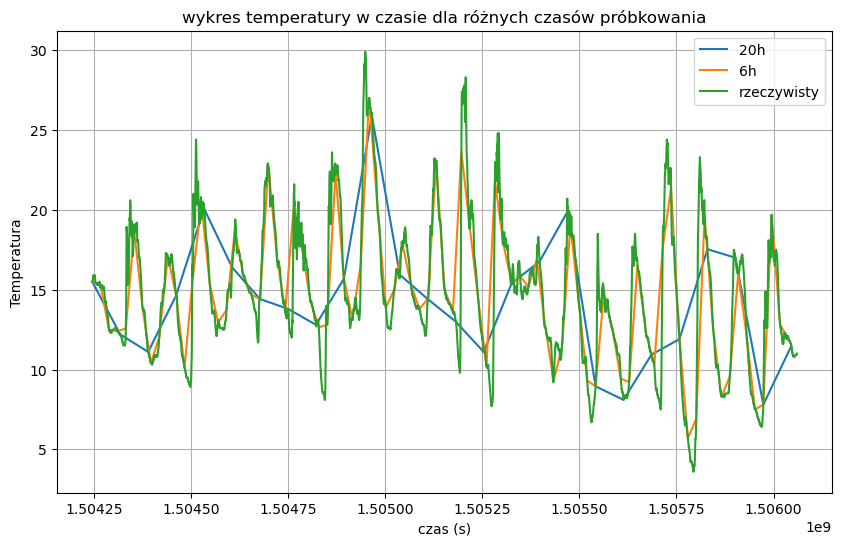

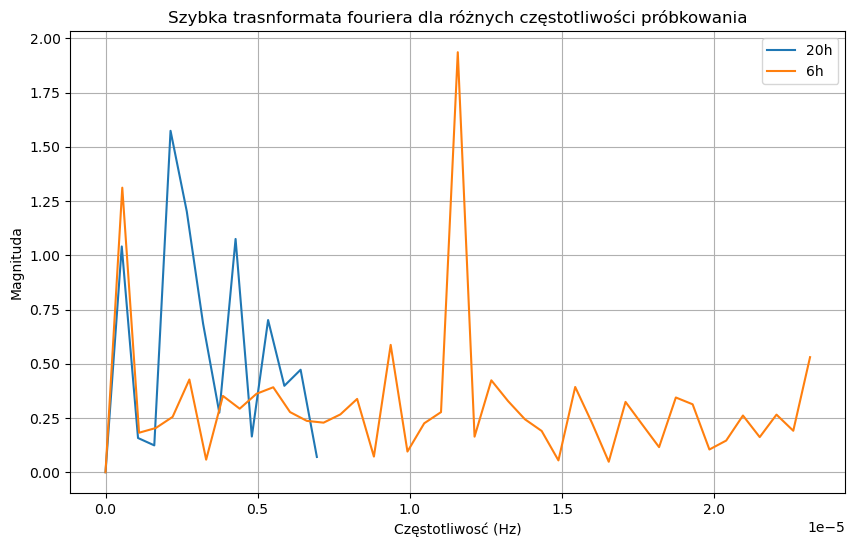

In [126]:
# 
# Próbkowanie co 20 godzin oraz próbkownanie co 6 godzin
# 

# Ustawienie zakresu jako wcześniej zdefiniowanych wartości t1 i t2
df_part = df[t_1:t_2]

# przypisanie wartości czasów w sekundach(timestamp) i temperatury do osobnych list
# wartość temperatury jest interpolowana przez to że pomiary nie były wykonywane w równych okresach czasu.
time = df_part['timeStamp'].values
temperature = df_part['temperatura'].interpolate(method='linear').values

# ustawienie częstotliwości próbkowania
sample_rate_1 = 1 / (20 * 60 * 60)  # próbkowanie co 20 godzin
sample_rate_2 = 1 / (6 * 60 * 60)  # próbkowanie co 6 godzin

samples_1 = np.arange(time[0], time[-1], 1 / sample_rate_1)  # równomierny czas próbkowania
samples_2 = np.arange(time[0], time[-1], 1 / sample_rate_2)  # równomierny czas próbkowania

# interpolacja temperatury w próbkach czasowych
interpolated_temperature_1 = np.interp(samples_1, time, temperature)
interpolated_temperature_2 = np.interp(samples_2, time, temperature)

# usunięcie składowej stałej sygnału w postaci średniej wartości temperatury
signal_1 = interpolated_temperature_1 - np.mean(interpolated_temperature_1)
signal_2 = interpolated_temperature_2 - np.mean(interpolated_temperature_2)

# obliczenie Szybkej transformaty Fouriera
def fourier(signal, sample_rate, samples):
    fft_output = np.fft.rfft(signal)
    num_of_samples = len(samples)
    magnitude = np.abs(fft_output) / num_of_samples
    frequencies = np.fft.rfftfreq(num_of_samples, d= 1/sample_rate)
    return magnitude, frequencies

magnitude_1, frequencies_1 = fourier(signal_1, sample_rate_1, samples_1)
magnitude_2, frequencies_2 = fourier(signal_2, sample_rate_2, samples_2)

# wykres temperatury w czasie dla różnych czasów próbkowania
plt.figure(figsize=(10, 6))
plt.plot(samples_1, interpolated_temperature_1, label='20h')  # Próbkowanie co 13 godzin
plt.plot(samples_2, interpolated_temperature_2, label='6h')  # Próbkowanie co 11 godzin
plt.plot(time, temperature, label='rzeczywisty')  # rzeczywisty

plt.xlabel('czas (s)')
plt.ylabel('Temperatura')
plt.title('wykres temperatury w czasie dla różnych czasów próbkowania')
plt.legend()
plt.grid(True)
plt.show()

# wykres dla różnych częstotliwości próbkowania w dziedzinie częstotliwości
plt.figure(figsize=(10, 6))
plt.plot(frequencies_1, magnitude_1, label='20h')  # Próbkowanie co 13 godzin
plt.plot(frequencies_2, magnitude_2, label='6h')  # Próbkowanie co 11 godzin

plt.xlabel('Częstotliwosć (Hz)')
plt.ylabel('Magnituda')
plt.title('Szybka trasnformata fouriera dla różnych częstotliwości próbkowania')
plt.legend()
plt.grid(True)
plt.show()

<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Jak widać na załączonych wykresach przy zmniejszeniu częstotliwości próbkowania (próbki co 20 godzin) dochodzi do zjawiska aliasingu, gdzie nie jesteśmy w stanie prawidłowo określić przebiegu rzeczywistego sygnału, rónież w dziedzinie częstotliwosći sam zakres odczytywanych częstotliwości nie pozwala nam na wykrycie pożądanego piku co jest widoczne przy większej częstotliwości (wykres pomarańczowy, próbkowanie co 6 godzin)
</div>

## 3. Wnioski

<div style="text-align: justify; line-height: 1.6; margin: 10px;">
Podczas labolatorium został obliczony okres zmian temperatury. Na podstawie dostępnych danych pomiarów temperatury w przestrzeni 3 tygodni przeprowadzono szybką trasnformatę Foutiera w celu przeniesienia danych na temat temperatury z dziedziny czasu do dziedziny częstotliwości. Dzięki temu możliwe było zauważenie piku związanego z okresowością danych pogodowych. Jak można się spodziewać okres zmiany temperatury wyniósł 24 godziny,tak więc dokładnie jeden dzień. Podczas przeprowadzania obliczeń sprawdzono również twierdzenie Shanona o próbkowaniu, a co za tym idzie wpływ częstotliwości próbkowania na otzrymane wyniki.
</div>
